영문분석 데이터 Load

In [3]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize,WordPunctTokenizer  
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

데이터 로드 및 병합

In [4]:
all_files = glob.glob('./RISS_Excel/myCabinetExcelData*.xls')

all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

all_files_data_concat = pd.concat(all_files_data,axis=0, ignore_index=True)

제목만 뽑아내기

In [5]:
all_title = all_files_data_concat['제목']
all_title

0      Agile Big Data Analytics for Web-Based Systems...
1      A big data analytics framework for border cros...
2             Guest Editorial: Big Data Infrastructure I
3        Guest Editorial: Big Data Analytics and the Web
4      Guest Editorial: Big Scholar Data Discovery an...
                             ...                        
995    A big data-based RF localisation method for un...
996                          Scalable big data modelling
997    Health big data analytics: current perspective...
998    Analyzing Big Smart Metering Data Towards Diff...
999              Intelligent big data analysis: a review
Name: 제목, Length: 1000, dtype: object

데이터 전처리  
- stopwrod 불러오기  
- 만약 에러 발생시 :  
```python
import nltk   
nltk.download('stopwords')
```

In [6]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

데이터 전처리   
- 단어 단위로 자르기
- 에러발생시
```python
import nltk
nltk.download('punkt')  
nltk.download('wordnet')
```  

``` python
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+",' ',str(title))       # 알파벳을 제외한 나머지를 공백으로 치환
    EnWordsToken = word_tokenize(EnWords.lower())        # 소문자로 통일 후 단어별로 자름
    EnWordsTokenStop = [ w for w in EnWordsToken if w not in stopWords]   # 자른단어가 종료문자에 있지않으면 리스트에 추가
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]   # 표제어 추출
    words.append(EnWordsTokenStopLemma)
print(words)
```

In [7]:
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+",' ',str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [ w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print(words)

[['agile', 'big', 'data', 'analytics', 'web', 'based', 'system', 'architecture', 'centric', 'approach'], ['big', 'data', 'analytics', 'framework', 'border', 'crossing', 'transportation'], ['guest', 'editorial', 'big', 'data', 'infrastructure'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['architecting', 'time', 'critical', 'big', 'data', 'system'], ['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining'], ['speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets'], ['five', 'layer', 'architecture', 'big', 'data', '

In [8]:
words2 = list(reduce(lambda x,y : x+y, words))
print(words2)

['agile', 'big', 'data', 'analytics', 'web', 'based', 'system', 'architecture', 'centric', 'approach', 'big', 'data', 'analytics', 'framework', 'border', 'crossing', 'transportation', 'guest', 'editorial', 'big', 'data', 'infrastructure', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'architecting', 'time', 'critical', 'big', 'data', 'system', 'guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'speed', 'big', 'data', 'analytics', 'unveiling', 'storage', 'distribution', 'sub', 'datasets', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics',

단어 빈도 구하기

In [9]:
count = Counter(words2)
count

Counter({'agile': 1,
         'big': 1346,
         'data': 1617,
         'analytics': 134,
         'web': 9,
         'based': 64,
         'system': 48,
         'architecture': 12,
         'centric': 2,
         'approach': 43,
         'framework': 28,
         'border': 1,
         'crossing': 1,
         'transportation': 4,
         'guest': 10,
         'editorial': 13,
         'infrastructure': 11,
         'scholar': 3,
         'discovery': 14,
         'collaboration': 5,
         'medium': 13,
         'understanding': 11,
         'search': 7,
         'mining': 37,
         'part': 1,
         'architecting': 2,
         'time': 18,
         'critical': 4,
         'speed': 1,
         'unveiling': 1,
         'storage': 22,
         'distribution': 7,
         'sub': 1,
         'datasets': 5,
         'five': 4,
         'layer': 1,
         'processing': 29,
         'fuzzy': 2,
         'scalable': 12,
         'clustering': 8,
         'algorithm': 16,
         

단어 빈도 상위 50개 중 길이가 한글자 보다 큰 단어들만 추출

In [10]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print( '%s : %d' %(tag,counts))

data : 1617
big : 1346
analytics : 134
analysis : 73
based : 64
using : 54
management : 52
system : 48
science : 47
model : 44
approach : 43
challenge : 43
mining : 37
research : 36
smart : 33
learning : 33
health : 33
new : 32
driven : 31
cloud : 30
processing : 29
technology : 29
framework : 28
opportunity : 28
service : 25
small : 24
use : 24
issue : 23
quality : 23
storage : 22
computing : 22
application : 22
business : 22
review : 22
open : 22
earth : 22
efficient : 21
privacy : 21
knowledge : 21
perspective : 21
information : 21
survey : 20
platform : 20
network : 20
era : 20
distributed : 19
healthcare : 19
decision : 19
making : 19
time : 18


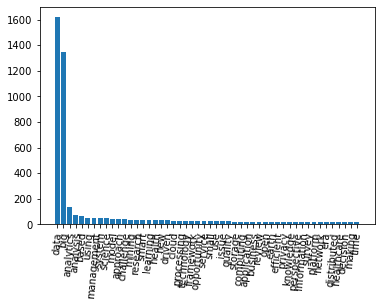

In [11]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)),list(sorted_Keys),rotation='85')
plt.show()

###  결과 시각화
년도별 논문수 그래프 그리기

In [12]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일',as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1994,2
1,1995,3
2,1996,2
3,1997,2
4,1998,4
5,1999,1
6,2000,1
7,2001,1
8,2002,4
9,2003,1


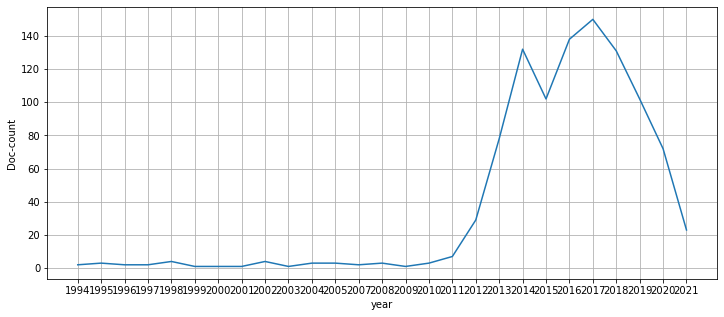

In [13]:
plt.figure(figsize=(12,5))
plt.xlabel('year')
plt.ylabel('Doc-count')
plt.grid(True)
plt.plot(range(len(summary_year)),summary_year['doc_count'])
plt.xticks(range(len(summary_year)),[text for text in summary_year['출판일']])
plt.show()

워드클라우드 그리기

In [15]:
cloud.to_file('bigdata_word_cloud.jpg')